<a href="https://colab.research.google.com/github/pumazzo/corso_AML_2025/blob/main/metropolis_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt



In [18]:
def metreopolis_step(lattice, beta, L):

  for r in range(L*L):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)

    # i valori dei 4 spin vicini #sopra, sotto, destra, sinistra
    up = lattice[(i-1)%L,j]
    down = lattice[(i+1)%L,j]
    right = lattice[i,(j+1)%L]
    left = lattice[i,(j-1)%L]

    dE = 2*lattice[i,j]*(up+down+right+left)

    if beta ==None:
       if dE < 0:# step a zero temp
        lattice[i,j] = -lattice[i,j]
    else:

      if dE < 0:
        lattice[i,j] = -lattice[i,j]
      else:
        if np.random.rand() < np.exp(-beta*dE):
          lattice[i,j] = -lattice[i,j]

  return lattice




In [19]:
#lattice random, a caso -1,1 su reticolo
L=32
lattice = np.random.choice([-1,1], size=(L,L))
metreopolis_step(lattice, 1, L).shape# test

(32, 32)

In [20]:
def compute_magnetization(lattice):
  return np.sum(lattice)/lattice.size

In [21]:
compute_magnetization(lattice)

np.float64(0.091796875)

In [22]:
# simulation loop, ripeti metropoli step per N step, definito da utente
def simulation_loop(lattice,n_steps,temperature,L):
  magnetizations = np.empty(n_steps)# salviamo la magnetizzazione a ogni tempo

  if temperature > 0:
    beta = 1/temperature
  else:
    beta = None

  for i in range(n_steps):
    lattice = metreopolis_step(lattice, beta, L)
    magnetizations[i] = compute_magnetization(lattice)

  return lattice, magnetizations

In [26]:
_ =simulation_loop(lattice,100,1,32)

In [28]:
def ising_simulation(grid_size,temperature, n_steps, initial_state=None):
  if initial_state is None:
    lattice = np.random.choice([-1,1], size=(grid_size,grid_size))
  else:
    lattice = initial_state

  start_simulation = time.time()# prende il tempo di inizio

  lattice,magnetizations = simulation_loop(lattice,n_steps,temperature,grid_size)

  total_time = time.time() - start_simulation# misuro intervallo di tempo

  return lattice, magnetizations, total_time

In [54]:
lattice,ms,t=ising_simulation(32,0.1, 100)
print("simulation time : ",time)

simulation time :  <module 'time' (built-in)>


In [55]:
1000*13/3600

3.611111111111111

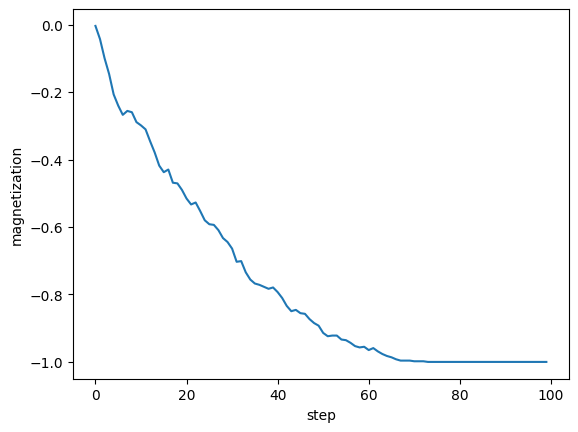

In [56]:
plt.plot(ms)
plt.xlabel("step")
plt.ylabel("magnetization")
plt.show()

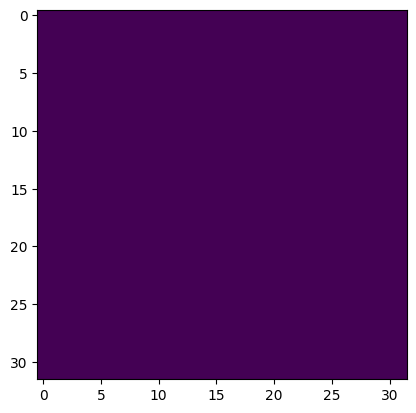

In [57]:
plt.imshow(lattice)
plt.show()